In [41]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [42]:
# Importing Dataset
df_train = pd.read_csv("RavdessAudioOnlyFeatures_TRAIN.csv")
df_test = pd.read_csv("RavdessAudioOnlyFeatures_TEST.csv")


## Data understanding



In [43]:
df_train['emotional_intensity'].value_counts()

normal    922
strong    788
Name: emotional_intensity, dtype: int64

In [44]:
round(df_train['emotional_intensity'].value_counts()/df_train['emotional_intensity'].count() * 100, 2)

normal    53.92
strong    46.08
Name: emotional_intensity, dtype: float64

<Axes: ylabel='emotional_intensity'>

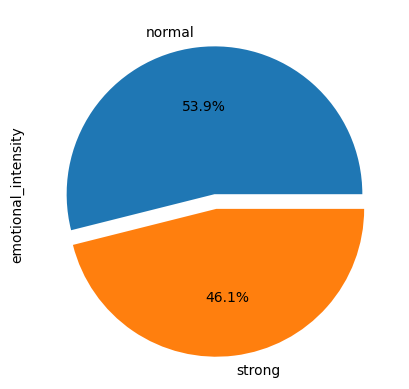

In [45]:
df_train['emotional_intensity'].value_counts().plot(kind = 'pie',explode= (0,0.1),autopct='%1.1f%%')


In [46]:
# Getting,

# Categorical Columns
categorical_cols = list(df_train.select_dtypes(include=['object']).columns)

# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

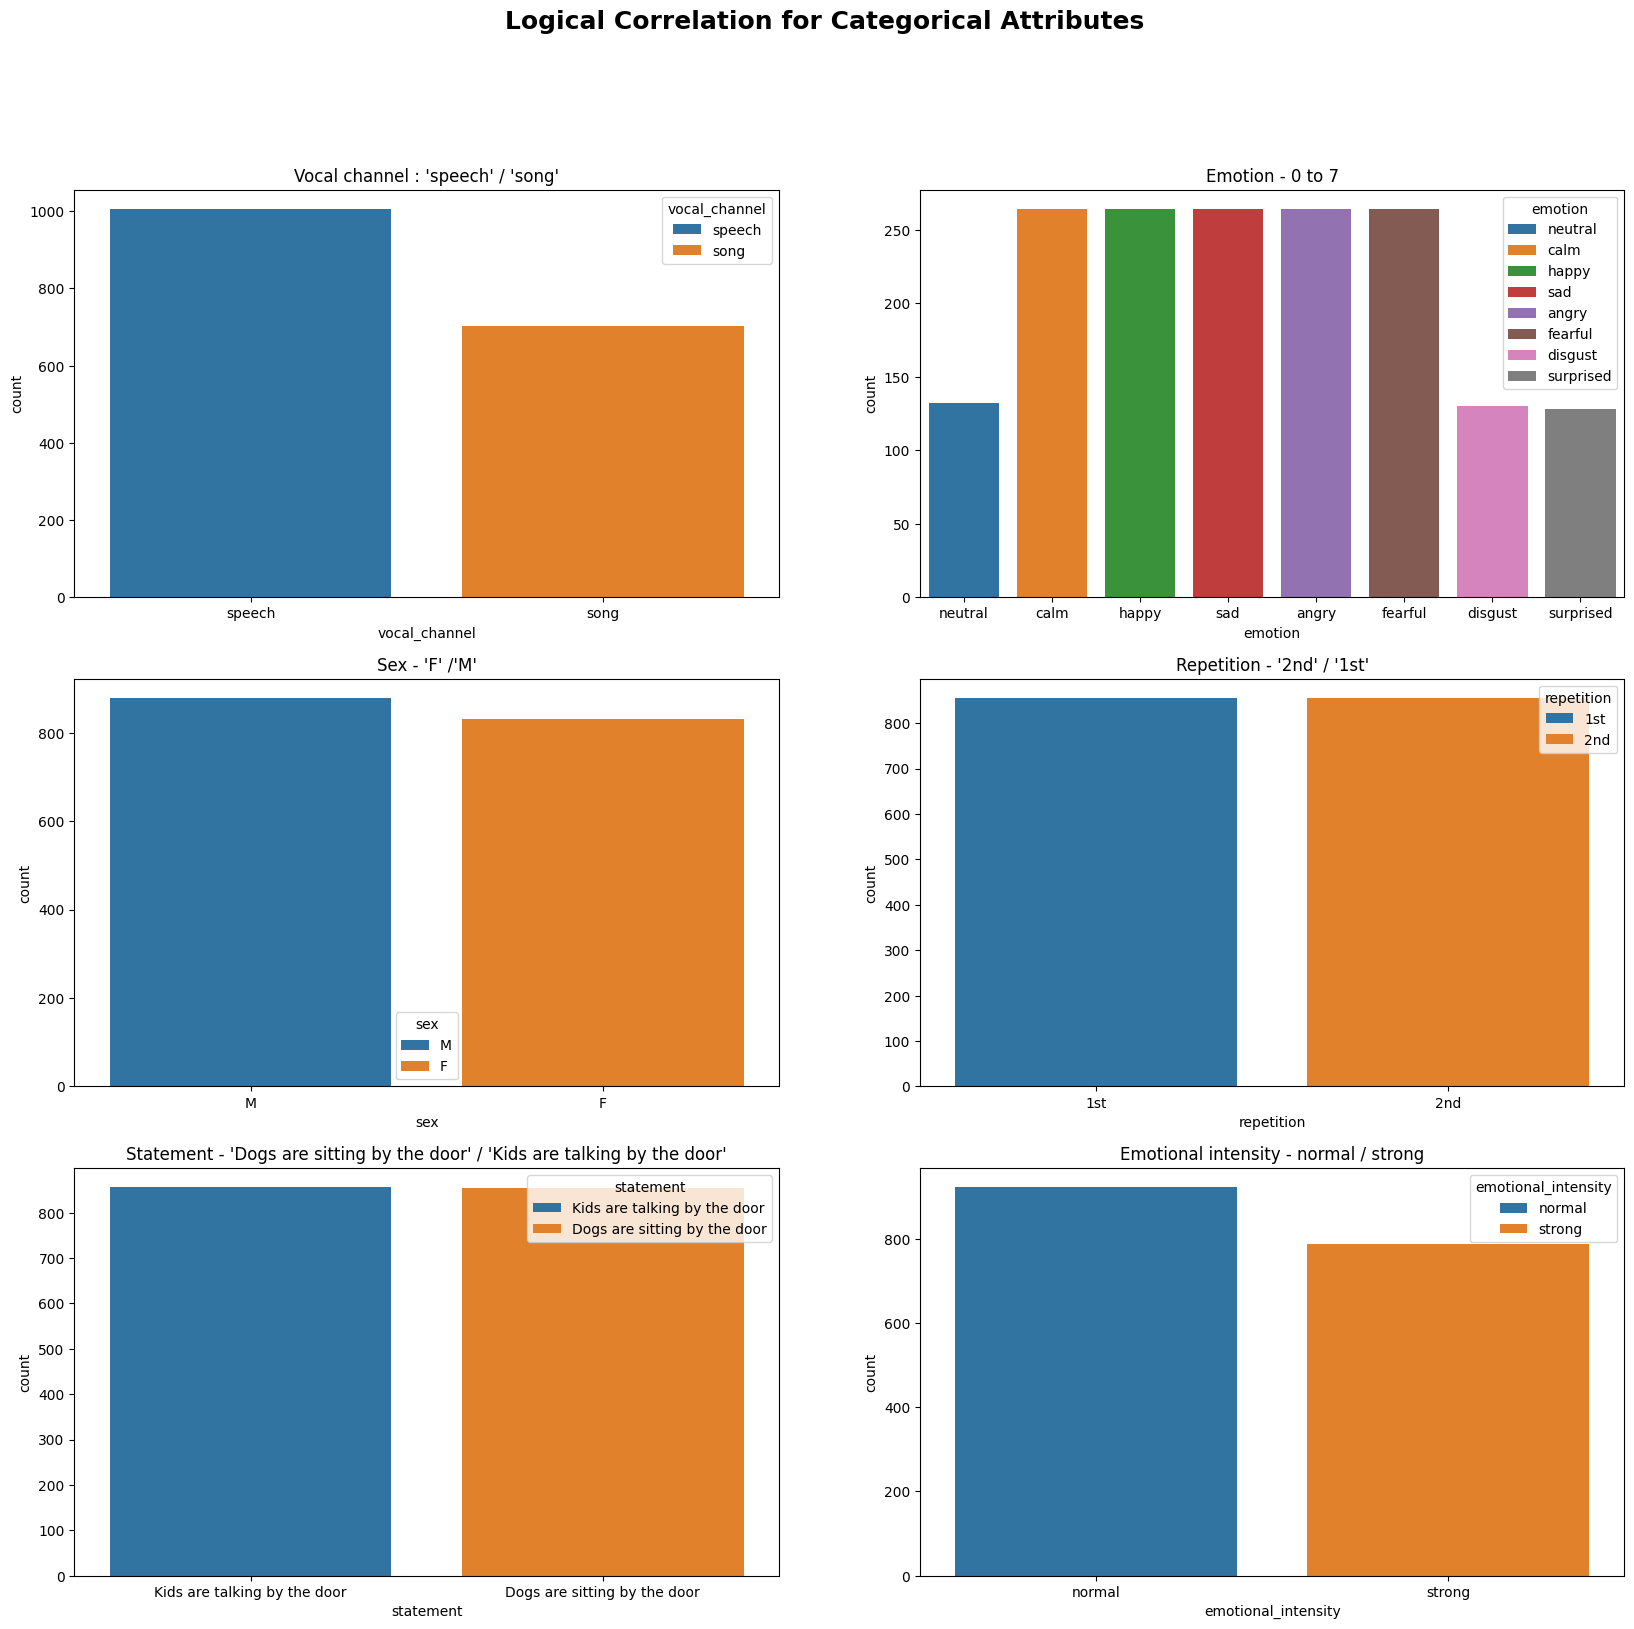

In [47]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = (20,18)) #checking the distribution

sns.countplot(data=df_train, x="vocal_channel", ax= ax1, hue = "vocal_channel", dodge=False)
ax1.set_title("Vocal channel : 'speech' / 'song'")

sns.countplot(data=df_train, x="emotion", ax= ax2, hue = "emotion", dodge=False)
# plt.xticks(rotation =90
ax2.set_title("Emotion - 0 to 7")

sns.countplot(data=df_train, x="sex", ax= ax3, hue = "sex", dodge=False)
ax3.set_title("Sex - 'F' /'M'")

sns.countplot(data=df_train, x="repetition", ax= ax4, hue = "repetition", dodge=False)
ax4.set_title("Repetition - '2nd' / '1st'")

sns.countplot(data=df_train, x="statement", ax= ax5, hue = "statement", dodge=False)
ax5.set_title("Statement - 'Dogs are sitting by the door' / 'Kids are talking by the door'")

sns.countplot(data=df_train, x="emotional_intensity", ax= ax6, hue = "emotional_intensity", dodge=False)
ax6.set_title("Emotional intensity - normal / strong")

plt.suptitle("Logical Correlation for Categorical Attributes",fontsize = 18, fontweight='bold')
plt.show()

In [48]:
# Checking No. of Instances
df_train.index

RangeIndex(start=0, stop=1710, step=1)

In [49]:
# Checking No. of Instances
len(df_train.columns)

434

In [50]:
# Getting,
# Numeric Columns
numeric_cols = list(df_train.select_dtypes(exclude=['object']).columns)

In [51]:
# Getting,

# Categorical Columns
categorical_cols = list(df_train.select_dtypes(include=['object']).columns)

In [52]:
categorical_cols

['modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex',
 'filename']

In [53]:
# len of num and cat cols
print("total cols: {}, num cols : {}, cat cols : {}".format(len(df_train.columns), len(numeric_cols), len(categorical_cols)))

total cols: 434, num cols : 426, cat cols : 8


In [54]:
# droppinf file name cz it doesnt matter
df_train.drop(columns='filename',axis=1, inplace=True)

In [55]:
categorical_cols.remove("filename")

In [56]:
for x in categorical_cols:
    print("{}: {}".format(x, df_train[x].unique()))

modality: ['audio-only']
vocal_channel: ['speech' 'song']
emotion: ['neutral' 'calm' 'happy' 'sad' 'angry' 'fearful' 'disgust' 'surprised']
emotional_intensity: ['normal' 'strong']
statement: ['Kids are talking by the door' 'Dogs are sitting by the door']
repetition: ['1st' '2nd']
sex: ['M' 'F']


In [57]:
# Converting Categorical Attributes to Numeric Values

statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

emotional_intensity_map = {"normal": 0, "strong": 1}

emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

repetition_map = {"1st": 0, "2nd": 1}

vocal_channel_map = {"speech": 0, "song": 1}

sex_map = {"M": 0, "F": 1}

df_train.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "emotion": emotion_map}, inplace=True)

In [58]:
# Converting Categorical Attributes to Numeric Values

statement_map = {"Dogs are sitting by the door": 0, "Kids are talking by the door": 1}

emotional_intensity_map = {"normal": 0, "strong": 1}

emotion_map = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fearful':5, 'disgust':6, 'surprised':7}

repetition_map = {"1st": 0, "2nd": 1}

vocal_channel_map = {"speech": 0, "song": 1}

sex_map = {"M": 0, "F": 1}

df_test.replace({"sex": sex_map, "emotional_intensity": emotional_intensity_map, 
            "vocal_channel": vocal_channel_map, "repetition": repetition_map, 
           "statement": statement_map, "emotion": emotion_map}, inplace=True)

In [59]:
df_train.drop(columns='modality',axis=1, inplace=True)

In [60]:
categorical_cols.remove("modality")

In [61]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,0,0,0,1,0,1,0,158558,0.145081,9.150000e-07,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,0,0,0,1,1,1,0,160160,0.114319,7.137790e-07,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,0,0,0,0,0,1,0,156956,0.149963,9.554485e-07,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,0,0,0,0,1,1,0,152152,0.139618,9.176213e-07,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,0,1,0,1,0,1,0,169769,0.137665,8.108948e-07,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [62]:
df_train["vocal_channel"].value_counts()

0    1006
1     704
Name: vocal_channel, dtype: int64

In [63]:
target_name = 'emotional_intensity'

attributes = [col for col in df_train.columns if col != target_name]

In [64]:
X = df_train[attributes].values
y = df_train[target_name]

In [65]:
X_train = df_train[attributes]
y_train = df_train[target_name]

In [66]:
X_test = df_test[attributes]
y_test = df_test[target_name]

In [67]:
df_train["emotional_intensity"].value_counts()

0    922
1    788
Name: emotional_intensity, dtype: int64

In [68]:
df_test["emotional_intensity"].value_counts()

0    336
1    288
Name: emotional_intensity, dtype: int64

## Missing Value

In [69]:
# Getting number of Missing Values
df_train.isnull().sum()

vocal_channel          0
emotion                0
emotional_intensity    0
statement              0
repetition             0
                      ..
stft_q75_w4            1
stft_q95_w4            1
stft_q99_w4            1
stft_kur_w4            1
stft_skew_w4           1
Length: 432, dtype: int64

In [70]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df_train)
percent_nan

mfcc_max_w3     0.06
mfcc_q50_w4     0.06
mfcc_q25_w4     0.06
mfcc_q05_w4     0.06
mfcc_q01_w4     0.06
                ... 
stft_q95_w3     0.06
stft_q75_w3     0.06
stft_q50_w3     0.06
stft_q05_w3     0.06
stft_skew_w4    0.06
Length: 123, dtype: float64

In [71]:
# Getting number of Missing Values
df_train.isnull().sum()

vocal_channel          0
emotion                0
emotional_intensity    0
statement              0
repetition             0
                      ..
stft_q75_w4            1
stft_q95_w4            1
stft_q99_w4            1
stft_kur_w4            1
stft_skew_w4           1
Length: 432, dtype: int64

In [72]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df_train)
percent_nan

mfcc_max_w3     0.06
mfcc_q50_w4     0.06
mfcc_q25_w4     0.06
mfcc_q05_w4     0.06
mfcc_q01_w4     0.06
                ... 
stft_q95_w3     0.06
stft_q75_w3     0.06
stft_q50_w3     0.06
stft_q05_w3     0.06
stft_skew_w4    0.06
Length: 123, dtype: float64

## Initial Classification test with raw data

# # Decision Tree

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

param_grid = {'criterion': criterion,
             "max_depth" : max_depth
             }

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5)

grid_model.fit(X_train,y_train)

ValueError: ignored

In [ ]:
dec_tree = grid_model.best_estimator_
dec_tree

In [ ]:
y_pred = dec_tree.predict(X_test)

In [ ]:
# Print feature importance for non-zero values
for i in range(len(dec_tree.feature_importances_)):
    if dec_tree.feature_importances_[i] != 0:
        print(f"{X_train.columns[i]}: {dec_tree.feature_importances_[i]:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

# # KNN

In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Creating a Pipeline to find K value
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

k_values = list(range(1, int(math.sqrt(len(df_train)) + 1)))
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=10,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

In [ ]:
full_cv_classifier.cv_results_['mean_test_score']

In [ ]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-', label='Test Error')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
print(full_cv_classifier.best_score_), print(full_cv_classifier.best_params_), print(full_cv_classifier.best_estimator_)

In [ ]:
y_pred = full_cv_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, classification_report
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

# # Getting highly correlated atttributes count

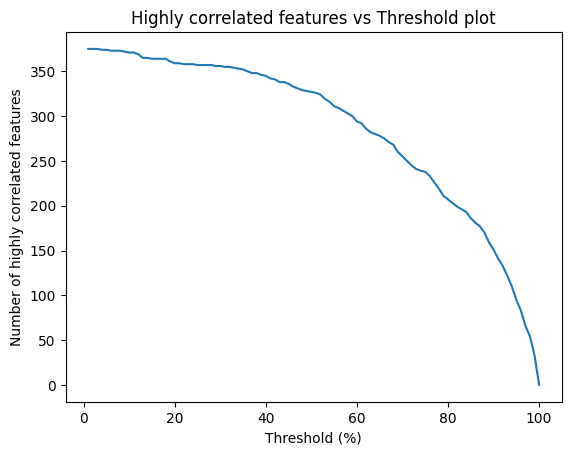

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = df_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find number of highly correlated features above different thresholds
no_corr_att = [] #no. of correlated attributes
for i in range(100, 0, -1):
    threshold = i * 0.01
    highly_correlated = [column for column in upper.columns if any(upper[column] > threshold)]
    no_corr_att.append(len(highly_correlated))

# Plot the highly correlated features against different thresholds
plt.plot(np.arange(1, 101)[::-1], no_corr_att)
plt.xlabel('Threshold (%)')
plt.ylabel('Number of highly correlated features')
plt.title('Highly correlated features vs Threshold plot')
plt.show()

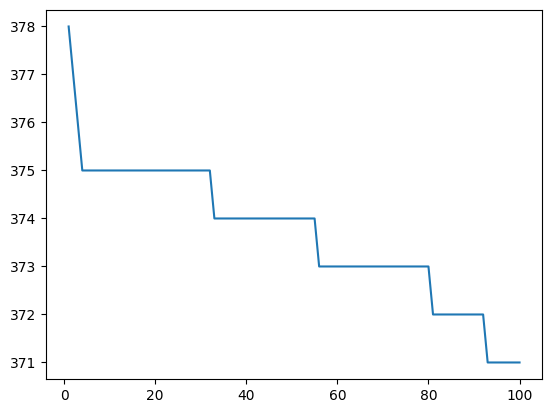

In [74]:
# Getting Highly correlated attributes from 100% to 1%

# Compute the correlation matrix
corr_matrix = df_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
no_corr_att = [] #no. of correlated attributes

for i in range(100, 0, -1):
     highly_correlated = [column for column in upper.columns if any(upper[column] > (i * 0.001))]
     no_corr_att.append(len(highly_correlated))

plt.plot(range(100, 0, -1), no_corr_att)

In [ ]:
plt.plot(range(100, 0, -1), no_corr_att)
plt.xlim(90, 92)
plt.ylim(370.75, 371.5)

# so, above 91% there are 371 highly correlated attributes to be removed

In [ ]:
highly_correlated = [column for column in upper.columns if any(upper[column] > (91 * 0.001))]
len(highly_correlated)
len(df_train.columns) - len(highly_correlated)

# # Dimensionality reduction

## 1)Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.2)
X_train_sel = sel.fit_transform(X_train)

X_train.shape, X_train_sel.shape

In [ ]:
# KNN
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

X_test.shape, X_test_sel.shape

In [ ]:
# Decision Tree
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

X_test.shape, X_test_sel.shape

## 2)Univariate Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
# KNN
k = [9,8,7,6,5,4,3,2,1]
for x in k:
    sel = SelectKBest(k=x)
    X_train_sel = sel.fit_transform(X_train, y_train)

    X_test_sel = sel.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=13)
    clf.fit(X_train_sel, y_train)

    y_pred = clf.predict(X_test_sel)

    print (X_train_sel.shape), print(sel.get_support(indices = True))
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred))



In [ ]:
# Decision Tree
k = [9,8,7,6,5,4,3,2,1]
for x in k:
    sel = SelectKBest(k=x)
    X_train_sel = sel.fit_transform(X_train, y_train)
    X_test_sel = sel.transform(X_test)

    clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
    clf.fit(X_train_sel, y_train)

    y_pred = clf.predict(X_test_sel)

    print (X_train_sel.shape), print(sel.get_support(indices = True))
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred))

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# # KNN
# k = [9,8,7,6,5,4,3,2,1]

# sel = RFE(DecisionTreeClassifier(), n_features_to_select=10)
# X_train_sel = sel.fit_transform(X_train, y_train)
# X_test_sel = sel.transform(X_test)

# clf = KNeighborsClassifier(n_neighbors=13)
# clf.fit(X_train_sel, y_train)
# y_pred = clf.predict(X_test_sel)

# print(X_train_sel.shape), print(sel.get_support(indices=True))
# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))



In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, f1_score, classification_report

# k_range = range(1, 10) # Range of number of features to test

# for k in k_range:
#     sel = RFE(DecisionTreeClassifier(), n_features_to_select=k)
#     X_train_sel = sel.fit_transform(X_train, y_train)
#     X_test_sel = sel.transform(X_test)

#     clf = KNeighborsClassifier(n_neighbors=13)
#     clf.fit(X_train_sel, y_train)

#     y_pred = clf.predict(X_test_sel)

#     print(f"Number of features: {k}")
#     print(f"Selected features indices: {sel.get_support(indices=True)}")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
#     print(f"F1-score: {f1_score(y_test, y_pred, average=None)}")
#     print(classification_report(y_test, y_pred))


In [ ]:
# # Decision Tree
# k = [9,8,7,6,5,4,3,2,1]
# for x in k:
#     sel = RFE(DecisionTreeClassifier(), n_features_to_select=x)
#     X_train_sel = sel.fit_transform(X_train, y_train)
#     X_test_sel = sel.transform(X_test)

#     clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
#     clf.fit(X_train_sel, y_train)

#     y_pred = clf.predict(X_test_sel)

#     print (X_train_sel.shape), print(sel.get_support(indices = True))
#     print('Accuracy %s' % accuracy_score(y_test, y_pred))
#     print('F1-score %s' % f1_score(y_test, y_pred, average=None))
#     print(classification_report(y_test, y_pred))

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
k_range = list(range(1, int(math.sqrt(len(df_train)) + 1)))
param_grid = dict(n_neighbors=k_range)

In [ ]:
unscaled_clf = make_pipeline(PCA(n_components=2), GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy'))
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

In [ ]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [ ]:
print('\nPrediction accuracy for the normal test dataset with PCA')
print('Accuracy %s' % accuracy_score(y_test, pred_test))
print('F1-score %s' % f1_score(y_test, pred_test, average=None))
print(classification_report(y_test, pred_test))

In [ ]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('Accuracy %s' % accuracy_score(y_test, pred_test_std))
print('F1-score %s' % f1_score(y_test, pred_test_std, average=None))
print(classification_report(y_test, pred_test_std))

In [ ]:
unscaled_clf[1].best_estimator_

In [ ]:
std_clf[2].best_estimator_

In [ ]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [ ]:
print('\nPC eigenvalues without scaling:\n', pca.explained_variance_ratio_)
print('\nPC eigenvalues with scaling:\n', pca_std.explained_variance_ratio_)

In [ ]:
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

In [ ]:
a = make_pipeline(PCA(n_components=10), GridSearchCV(DecisionTreeClassifier(), param_list, cv = 10, scoring = 'accuracy'))
a.fit(X_train, y_train)
pca = a.named_steps['pca']

In [ ]:
plt.plot(pca.explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA with normal test dataset")
plt.ylabel("Fraction of Variance")
plt.show()

In [ ]:
a = make_pipeline(StandardScaler(),PCA(n_components=10), GridSearchCV(DecisionTreeClassifier(), param_list, cv = 10, scoring = 'accuracy'))
a.fit(X_train, y_train)
pca = a.named_steps['pca']

In [ ]:
plt.plot(pca.explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA with standardized test dataset")
plt.ylabel("Fraction of Variance")
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (15,5))


for l, c, m in zip(range(0, 2), ("red","blue"), ('^', 's')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), ("red","blue"), ('^', 's')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

## Decision Tree

In [ ]:
param_list = {
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': [2,5,10,20,50,100,150,200],
    'min_samples_leaf': [10,50,100,150,200],
    'criterion': ['gini', 'entropy']
}

In [ ]:
unscaled_clf = make_pipeline(PCA(n_components=2), GridSearchCV(DecisionTreeClassifier(), param_list, cv = 10, scoring = 'accuracy'))
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

In [ ]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GridSearchCV(DecisionTreeClassifier(), param_list, cv = 10, scoring = 'accuracy'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [ ]:
print('\nPrediction accuracy for the normal test dataset with PCA')
print('Accuracy %s' % accuracy_score(y_test, pred_test))
print('F1-score %s' % f1_score(y_test, pred_test, average=None))
print(classification_report(y_test, pred_test))

In [ ]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('Accuracy %s' % accuracy_score(y_test, pred_test_std))
print('F1-score %s' % f1_score(y_test, pred_test_std, average=None))
print(classification_report(y_test, pred_test_std))

In [ ]:
unscaled_clf[1].best_estimator_

In [ ]:
std_clf[2].best_estimator_

In [ ]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [ ]:
print('\nPC eigenvalues without scaling:\n', pca.explained_variance_ratio_)
print('\nPC eigenvalues with scaling:\n', pca_std.explained_variance_ratio_)

In [ ]:
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

In [ ]:
a = make_pipeline(PCA(n_components=10), GridSearchCV(DecisionTreeClassifier(), param_list, cv = 10, scoring = 'accuracy'))
a.fit(X_train, y_train)
pca = a.named_steps['pca']

In [ ]:
plt.plot(pca.explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA with normal test dataset")
plt.ylabel("Fraction of Variance")
plt.show()

In [ ]:
a = make_pipeline(StandardScaler(),PCA(n_components=10), GridSearchCV(DecisionTreeClassifier(), param_list, cv = 10, scoring = 'accuracy'))
a.fit(X_train, y_train)
pca = a.named_steps['pca']

In [ ]:
plt.plot(pca.explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA with standardized test dataset")
plt.ylabel("Fraction of Variance")
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (15,5))


for l, c, m in zip(range(0, 2), ("red","blue"), ('^', 's')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), ("red","blue"), ('^', 's')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

## Multi Dimensional Scaling